#https://www.youtube.com/watch?v=MmC4b7gPY0Q&list=PL4vZYKhVIgAaUSviESMkPYmQeC5CNuodP&index=4&t=0s

In [1]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('clean_quake_ready.csv', header=0, index_col=0, parse_dates=[0])
print(series.head())

            Magnitude
Date                 
2019-12-08   1.084623
2019-12-09   1.039060
2019-12-10   0.955169
2019-12-11   0.887006
2019-12-12   0.992727


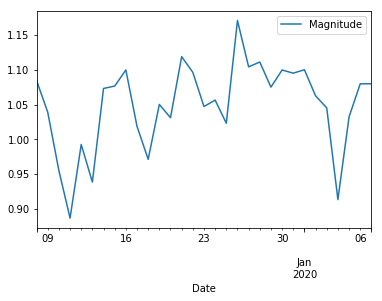

In [2]:
series.plot()
pyplot.show()

In [3]:
type(series)

pandas.core.frame.DataFrame

,Magnitude
count,31.000000
mean,1.049383
std,0.063570
min,0.887006
25%,1.027250
50%,1.062581
75%,1.095771
max,1.170886


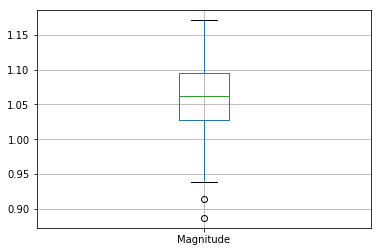

In [4]:
series_values = series.values
series.boxplot()
series.describe()

In [5]:
rolling_mean = series.rolling(window=5).mean()

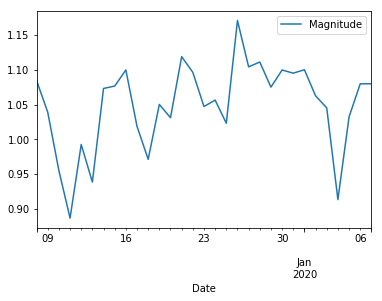

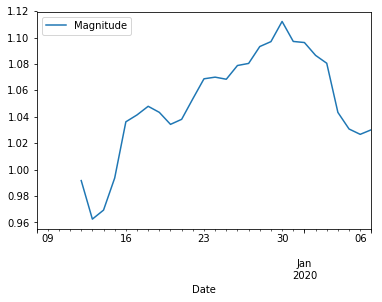

In [6]:
series.plot()
rolling_mean.plot()

In [7]:
series.describe()  # mean is an indication of future prediction values

,Magnitude
count,31.000000
mean,1.049383
std,0.063570
min,0.887006
25%,1.027250
50%,1.062581
75%,1.095771
max,1.170886


In [8]:
# Option-1
values = pd.DataFrame(series_values)
df_values = pd.concat([values,values.shift(1)],axis=1)
df_values.columns = ['Magnitudes','Forecast_Magnitudes']

In [9]:
# # Option-2
# df_values = pd.concat([series['Births'],series['Births'].shift(1)],axis=1)
# df_values.columns = ['Births','Forecast_Birth']

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np
df_values.head()

,Magnitudes,Forecast_Magnitudes
0,1.084623,NaN
1,1.039060,1.084623
2,0.955169,1.039060
3,0.887006,0.955169
4,0.992727,0.887006


In [11]:
# Remove 'NAN' records, such as in the first row
df_test = df_values[1:]

# Also remove Outliers from data values


In [12]:
data_error = mean_squared_error(df_test.Magnitudes,df_test.Forecast_Magnitudes)

In [13]:
data_error

0.004575777032618441

In [14]:
# +- 0.067 magnitudes for every forecast
np.sqrt(data_error)


0.06764449003886748

In [15]:
#ARIMA (Autoregressive Integrated (d) Average)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

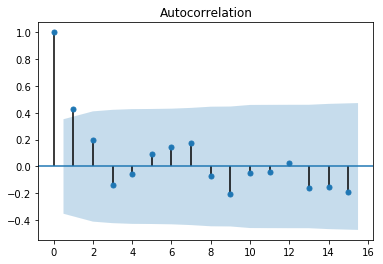

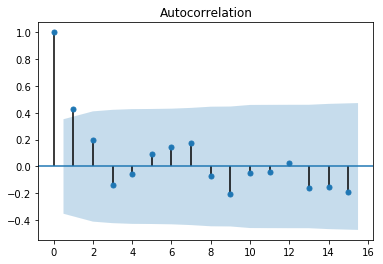

In [16]:
# plot_acf is to identify parameter Q
# ARIMA(p,d,q)
plot_acf(series)


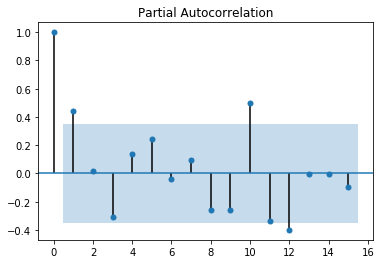

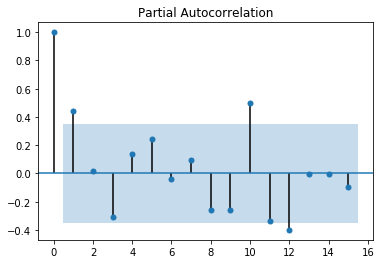

In [17]:
# # plot_acf is to identify parameter P
# # ARIMA(p,d,q)
plot_pacf(series)
# # p = 2,3  # d = 1  # q = 3,4

In [18]:
#Option-1
#Split the data into train and test
#size = int(len(series) * 0.66)
#series_train, series_test = series[0:size], series[size:]


In [19]:
#Option-2
#Split the data into train and test
print(series.size) # 31
series_train = series[0:25]
series_test = series[25:30]

31


In [21]:
from statsmodels.tsa.arima_model import ARIMA

# p = 2,3  # d = 1  # q = 3,4
# Play with different combination of ordering (p,d,q)
# The ordering with the lowest aic is the best model
model = ARIMA(series,order=(3,1,4))

C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [22]:
model_fit = model.fit()

In [31]:
model_fit.save("model_quakes.h5")

In [24]:
model_fit.aic

-70.4533340657029

In [25]:
series.tail()

,Magnitude
Date,
2020-01-03,1.045298
2020-01-04,0.913590
2020-01-05,1.032348
2020-01-06,1.079856
2020-01-07,1.080000


In [26]:
print(series.index[-1])

2020-01-07 00:00:00


In [27]:
import datetime
from datetime import timedelta
#lastdate = '1959-12-31'  # Make sure it is a date format
# lastdate = datetime.datetime.strptime(lastdate, '%Y-%m-%d')
lastdate = series.index[-1]
future_date = datetime.datetime.strptime('2020-01-13', '%Y-%m-%d')
datediff = (future_date - lastdate).days
forecast = model_fit.forecast(steps=datediff)[0]
print("My forecast for {} is {}".format(future_date,forecast[-1]))

My forecast for 2020-01-13 00:00:00 is 1.0883949748368742


In [28]:
# Check error
quakeforecast = model_fit.forecast(steps = 5)[0]
quakeforecast

array([1.03052208, 0.98593734, 0.98730982, 1.02724946, 1.073535  ])

In [29]:
series_test

,Magnitude
Date,
2020-01-02,1.062581
2020-01-03,1.045298
2020-01-04,0.913590
2020-01-05,1.032348
2020-01-06,1.079856


In [30]:
np.sqrt(mean_squared_error(series_test,quakeforecast))
# 0.044 is better than 0.067 (former naive analysis)

0.04483759113166703

In [39]:
# import datetime
# from datetime import timedelta
# #lastdate = '1959-12-31'  # Make sure it is a date format
# # lastdate = datetime.datetime.strptime(lastdate, '%Y-%m-%d')
# # lastdate = series.index[-1]
# # future_date = datetime.datetime.strptime('2020-01-12', '%Y-%m-%d')
# # datediff = (future_date - lastdate).days
# # forecast = model_fit.forecast(steps=datediff)[0]
# # print("My forecast for {} is {}".format(future_date,forecast[-1]))

# for f in forecast:
#    lastdate = lastdate + timedelta(days=1)
#    print('{} = {}'.format(lastdate,f))
#    lastdate = lastdate + timedelta(days=1)
#    if lastdate==future_date:
#        print('{} = {}'.format(lastdate,f))
#        break